## 8-puzzle
Se da o cutie patratica 3\*3 in care se gasesc 8 tablite distincte cu numere de la 1 la 8. Se da o configuratie initiala si o configuratie finala. Tablitele se pot muta in cutie doar prin glisarea in spatiul liber. O mutare consta, deci, dintr-o singura glisare. Se cere sa se afiseze mutarile necesare pentru a ajunge de la configuratia initiala la cea finala folosind Algoritmul A\*.


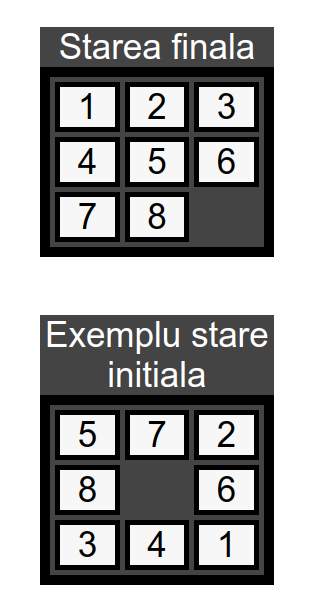

In [26]:
"""
Dati enter dupa fiecare solutie afisata.
 
"""

import copy
import sys
import time

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost #consider cost=1 pentru o mutare
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for i,nod in enumerate(l):
            print(i+1,")\n",str(nod), sep="")
        if afisCost:
            print("Cost: ", self.g)
        if afisCost:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)


    #euristica banală: daca nu e stare scop, returnez 1, altfel 0


    def __str__(self):
        sir=""
        for linie in self.info:
            sir+=" ".join([str(elem) for elem in linie])+"\n"
        sir+="\n"
        return sir

In [27]:
class Graph: #graful problemei
    def __init__(self, nume_fisier):
        f=open(nume_fisier, "r")
        sirFisier=f.read()
        try:
            listaLinii=sirFisier.strip().split("\n")
            self.start=[]
            for linie in listaLinii:
                self.start.append([int(x) for x in linie.strip().split(" ")])
            print(self.start)
            #verificarea corectitudinii starii de start
            self.scopuri=[  [[1,2,3],[4,5,6],[7,8,0]]  ]
            print(self.scopuri)
        except:
            print("Eroare la parsare!")
            sys.exit(0) #iese din program

    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri


    # nr inversiuni trebuie sa fie par ca sa putem ajunge in starea finala
    def nuAreSolutii(self,infoNod):
        listaMatrice=sum(infoNod,[])
        nrInversiuni=0
        for i in range(len(listaMatrice)):
            if listaMatrice[i]!=0:
                for j in range(i+1,len(listaMatrice)):
                    if listaMatrice[j]!=0:
                        if listaMatrice[i]>listaMatrice[j]:
                            nrInversiuni+=1
        return nrInversiuni % 2 == 1


    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        for lGol in range(len(nodCurent.info)):
            try:
                cGol = nodCurent.info[lGol].index(0)
                break
            except:
                pass
        #stanga, dreapta, sus, jos
        directii=[[lGol, cGol-1],[lGol, cGol+1], [lGol-1, cGol], [lGol+1, cGol] ]
        for lPlacuta, cPlacuta in directii:
            if 0<=lPlacuta<3  and 0<= cPlacuta<3:
                copieMatrice=copy.deepcopy(nodCurent.info)
                copieMatrice[lGol][cGol]=copieMatrice[lPlacuta][cPlacuta]
                copieMatrice[lPlacuta][cPlacuta]=0
                if not nodCurent.contineInDrum(copieMatrice): # and not self.nuAreSolutii(copieMatrice):
                    costArc=1
                    listaSuccesori.append(NodParcurgere(copieMatrice,nodCurent,  nodCurent.g+costArc, self.calculeaza_h(copieMatrice,tip_euristica )))



        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        if infoNod in self.scopuri:
            return 0
        if tip_euristica=="euristica banala":
            return 1
        else:
            h=0
            for lPlacutaC in range(len(infoNod)):
                for cPlacutaC in range(len(infoNod[0])):
                    if infoNod[lPlacutaC][cPlacutaC]!=0:
                        placuta=infoNod[lPlacutaC][cPlacutaC]
                        lPlacutaF=(placuta-1)//len(infoNod[0])
                        cPlacutaF=(placuta-1)%len(infoNod[0])
                        h+= abs(lPlacutaF - lPlacutaC)+abs(cPlacutaF - cPlacutaC)
            return h

    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        

In [3]:
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)


In [4]:
def uniform_cost(gr, nrSolutiiCautate=1):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #ordonez dupa cost(notat cu g)
                if c[i].g>s.g :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [5]:
def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    if gr.nuAreSolutii(gr.start):
        print("Nu are solutii!")
        return 
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print(time.time()-t1, "secunde")
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica)
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [28]:
# Aici am creat programatic fisierul de input ca sa nu mai stam sa il incarcam in session storage;
# in principiu poate fi creat de mana si folosit
input_text = """
1 3 2
4 5 6
8 7 0
"""

with open("input.txt", "w+") as fin:
  fin.write(input_text)

In [29]:

gr=Graph("input.txt")               

#Rezolvat cu breadth first
#print("Solutii obtinute cu breadth first:")
#breadth_first(gr, nrSolutiiCautate=3)

#print("\n\n##################\nSolutii obtinute cu UCS:")
#uniform_cost(gr, nrSolutiiCautate=4)

print("\n\n##################\nSolutii obtinute cu A*:")
t1=time.time()
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica nebanala")

[[1, 3, 2], [4, 5, 6], [8, 7, 0]]
[[[1, 2, 3], [4, 5, 6], [7, 8, 0]]]


##################
Solutii obtinute cu A*:
Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 6
8 0 7


3)
1 3 2
4 0 6
8 5 7


4)
1 0 2
4 3 6
8 5 7


5)
0 1 2
4 3 6
8 5 7


6)
4 1 2
0 3 6
8 5 7


7)
4 1 2
8 3 6
0 5 7


8)
4 1 2
8 3 6
5 0 7


9)
4 1 2
8 3 6
5 7 0


10)
4 1 2
8 3 0
5 7 6


11)
4 1 2
8 0 3
5 7 6


12)
4 1 2
0 8 3
5 7 6


13)
4 1 2
5 8 3
0 7 6


14)
4 1 2
5 8 3
7 0 6


15)
4 1 2
5 0 3
7 8 6


16)
4 1 2
0 5 3
7 8 6


17)
0 1 2
4 5 3
7 8 6


18)
1 0 2
4 5 3
7 8 6


19)
1 2 0
4 5 3
7 8 6


20)
1 2 3
4 5 0
7 8 6


21)
1 2 3
4 5 6
7 8 0


Cost:  20
Lungime:  21
0.11823797225952148 secunde

----------------

Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 0
8 7 6


3)
1 3 0
4 5 2
8 7 6


4)
1 0 3
4 5 2
8 7 6


5)
0 1 3
4 5 2
8 7 6


6)
4 1 3
0 5 2
8 7 6


7)
4 1 3
5 0 2
8 7 6


8)
4 1 3
5 7 2
8 0 6


9)
4 1 3
5 7 2
0 8 6


10)
4 1 3
0 7 2
5 8 6


11)
4 1 3
7 0 2
5 8 6


12)
4 1 3
7 2 0
5 8 6


13)
4 1 3
7 2 6
5 8 0

In [30]:
%%time
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica nebanala")

Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 6
8 0 7


3)
1 3 2
4 0 6
8 5 7


4)
1 0 2
4 3 6
8 5 7


5)
0 1 2
4 3 6
8 5 7


6)
4 1 2
0 3 6
8 5 7


7)
4 1 2
8 3 6
0 5 7


8)
4 1 2
8 3 6
5 0 7


9)
4 1 2
8 3 6
5 7 0


10)
4 1 2
8 3 0
5 7 6


11)
4 1 2
8 0 3
5 7 6


12)
4 1 2
0 8 3
5 7 6


13)
4 1 2
5 8 3
0 7 6


14)
4 1 2
5 8 3
7 0 6


15)
4 1 2
5 0 3
7 8 6


16)
4 1 2
0 5 3
7 8 6


17)
0 1 2
4 5 3
7 8 6


18)
1 0 2
4 5 3
7 8 6


19)
1 2 0
4 5 3
7 8 6


20)
1 2 3
4 5 0
7 8 6


21)
1 2 3
4 5 6
7 8 0


Cost:  20
Lungime:  21
14.044626474380493 secunde

----------------

Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 0
8 7 6


3)
1 3 0
4 5 2
8 7 6


4)
1 0 3
4 5 2
8 7 6


5)
0 1 3
4 5 2
8 7 6


6)
4 1 3
0 5 2
8 7 6


7)
4 1 3
5 0 2
8 7 6


8)
4 1 3
5 7 2
8 0 6


9)
4 1 3
5 7 2
0 8 6


10)
4 1 3
0 7 2
5 8 6


11)
4 1 3
7 0 2
5 8 6


12)
4 1 3
7 2 0
5 8 6


13)
4 1 3
7 2 6
5 8 0


14)
4 1 3
7 2 6
5 0 8


15)
4 1 3
7 2 6
0 5 8


16)
4 1 3
0 2 6
7 5 8


17)
0 1 3
4 2 6
7 5 8


18)
1 0 3
4 2 6
7

# Exercitii (0.5p)

1. Pentru problema 8-puzzle implementați o euristica in care numărați câte plăcuțe nu sunt la locul lor (deoarece pentru fiecare astfel de plăcuță avem măcar o mutare de realizat). Comparați timpul de rulare pentru această euristică cu timpul de rulare pentru euristica din laborator.


In [31]:
"""
Dati enter dupa fiecare solutie afisata.
 
"""

import copy
import sys
import time

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost #consider cost=1 pentru o mutare
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for i,nod in enumerate(l):
            print(i+1,")\n",str(nod), sep="")
        if afisCost:
            print("Cost: ", self.g)
        if afisCost:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)


    #euristica banală: daca nu e stare scop, returnez 1, altfel 0


    def __str__(self):
        sir=""
        for linie in self.info:
            sir+=" ".join([str(elem) for elem in linie])+"\n"
        sir+="\n"
        return sir


class Graph: #graful problemei
    def __init__(self, nume_fisier):
        f=open(nume_fisier, "r")
        sirFisier=f.read()
        try:
            listaLinii=sirFisier.strip().split("\n")
            self.start=[]
            for linie in listaLinii:
                self.start.append([int(x) for x in linie.strip().split(" ")])
            print(self.start)
            #verificarea corectitudinii starii de start
            self.scopuri=[  [[1,2,3],[4,5,6],[7,8,0]]  ]
            print(self.scopuri)
        except:
            print("Eroare la parsare!")
            sys.exit(0) #iese din program

    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri


    # nr inversiuni trebuie sa fie par ca sa putem ajunge in starea finala
    def nuAreSolutii(self,infoNod):
        listaMatrice=sum(infoNod,[])
        nrInversiuni=0
        for i in range(len(listaMatrice)):
            if listaMatrice[i]!=0:
                for j in range(i+1,len(listaMatrice)):
                    if listaMatrice[j]!=0:
                        if listaMatrice[i]>listaMatrice[j]:
                            nrInversiuni+=1
        return nrInversiuni % 2 == 1


    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        for lGol in range(len(nodCurent.info)):
            try:
                cGol = nodCurent.info[lGol].index(0)
                break
            except:
                pass
        #stanga, dreapta, sus, jos
        directii=[[lGol, cGol-1],[lGol, cGol+1], [lGol-1, cGol], [lGol+1, cGol] ]
        for lPlacuta, cPlacuta in directii:
            if 0<=lPlacuta<3  and 0<= cPlacuta<3:
                copieMatrice=copy.deepcopy(nodCurent.info)
                copieMatrice[lGol][cGol]=copieMatrice[lPlacuta][cPlacuta]
                copieMatrice[lPlacuta][cPlacuta]=0
                if not nodCurent.contineInDrum(copieMatrice): # and not self.nuAreSolutii(copieMatrice):
                    costArc=1
                    listaSuccesori.append(NodParcurgere(copieMatrice,nodCurent,  nodCurent.g+costArc, self.calculeaza_h(copieMatrice,tip_euristica )))



        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        if tip_euristica=="euristica banala":
            if infoNod in self.scopuri:
              return 0
            return 1
        elif tip_euristica == "euristica ex 1":
            h = 0
            for lPlacutaC in range(len(infoNod)):
                for cPlacutaC in range(len(infoNod[0])):
                    if infoNod[lPlacutaC][cPlacutaC]!=0:
                       placuta=infoNod[lPlacutaC][cPlacutaC]
                       lPlacutaF=(placuta-1)//len(infoNod[0])
                       cPlacutaF=(placuta-1)%len(infoNod[0])
                       if lPlacutaF != lPlacutaC or cPlacutaF != cPlacutaC:
                         h += 1
            return h
        # if infoNod in self.scopuri:
        #     return 0
        # if tip_euristica=="euristica banala":
        #     return 1
        else:
            h=0
            for lPlacutaC in range(len(infoNod)):
                for cPlacutaC in range(len(infoNod[0])):
                    if infoNod[lPlacutaC][cPlacutaC]!=0:
                        placuta=infoNod[lPlacutaC][cPlacutaC]
                        lPlacutaF=(placuta-1)//len(infoNod[0])
                        cPlacutaF=(placuta-1)%len(infoNod[0])
                        h+= abs(lPlacutaF - lPlacutaC)+abs(cPlacutaF - cPlacutaC)
            return h

    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)

def uniform_cost(gr, nrSolutiiCautate=1):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        print("Coada actuala: " + str(c))
        # input()
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #ordonez dupa cost(notat cu g)
                if c[i].g>s.g :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    if gr.nuAreSolutii(gr.start):
        print("Nu are solutii!")
        return 
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print(time.time()-t1, "secunde")
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica)
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [33]:
# Aici am creat programatic fisierul de input ca sa nu mai stam sa il incarcam in session storage;
# in principiu poate fi creat de mana si folosit
input_text = """
1 3 2
4 5 6
8 7 0
"""

with open("input.txt", "w+") as fin:
  fin.write(input_text)


gr=Graph("input.txt")               

#Rezolvat cu breadth first
#print("Solutii obtinute cu breadth first:")
#breadth_first(gr, nrSolutiiCautate=3)

#print("\n\n##################\nSolutii obtinute cu UCS:")
#uniform_cost(gr, nrSolutiiCautate=4)


print("\n\n##################\nSolutii obtinute cu A*:")
t1=time.time()


[[1, 3, 2], [4, 5, 6], [8, 7, 0]]
[[[1, 2, 3], [4, 5, 6], [7, 8, 0]]]


##################
Solutii obtinute cu A*:


In [34]:
%%time
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica ex1")


Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 6
8 0 7


3)
1 3 2
4 0 6
8 5 7


4)
1 0 2
4 3 6
8 5 7


5)
0 1 2
4 3 6
8 5 7


6)
4 1 2
0 3 6
8 5 7


7)
4 1 2
8 3 6
0 5 7


8)
4 1 2
8 3 6
5 0 7


9)
4 1 2
8 3 6
5 7 0


10)
4 1 2
8 3 0
5 7 6


11)
4 1 2
8 0 3
5 7 6


12)
4 1 2
0 8 3
5 7 6


13)
4 1 2
5 8 3
0 7 6


14)
4 1 2
5 8 3
7 0 6


15)
4 1 2
5 0 3
7 8 6


16)
4 1 2
0 5 3
7 8 6


17)
0 1 2
4 5 3
7 8 6


18)
1 0 2
4 5 3
7 8 6


19)
1 2 0
4 5 3
7 8 6


20)
1 2 3
4 5 0
7 8 6


21)
1 2 3
4 5 6
7 8 0


Cost:  20
Lungime:  21
2.002113103866577 secunde

----------------

Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 0
8 7 6


3)
1 3 0
4 5 2
8 7 6


4)
1 0 3
4 5 2
8 7 6


5)
0 1 3
4 5 2
8 7 6


6)
4 1 3
0 5 2
8 7 6


7)
4 1 3
5 0 2
8 7 6


8)
4 1 3
5 7 2
8 0 6


9)
4 1 3
5 7 2
0 8 6


10)
4 1 3
0 7 2
5 8 6


11)
4 1 3
7 0 2
5 8 6


12)
4 1 3
7 2 0
5 8 6


13)
4 1 3
7 2 6
5 8 0


14)
4 1 3
7 2 6
5 0 8


15)
4 1 3
7 2 6
0 5 8


16)
4 1 3
0 2 6
7 5 8


17)
0 1 3
4 2 6
7 5 8


18)
1 0 3
4 2 6
7 

2. Implementați o euristică neadmisibilă pentru 8-puzzle.


In [19]:
"""
Dati enter dupa fiecare solutie afisata.
 
"""

import copy
import sys
import time

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost #consider cost=1 pentru o mutare
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for i,nod in enumerate(l):
            print(i+1,")\n",str(nod), sep="")
        if afisCost:
            print("Cost: ", self.g)
        if afisCost:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)


    #euristica banală: daca nu e stare scop, returnez 1, altfel 0


    def __str__(self):
        sir=""
        for linie in self.info:
            sir+=" ".join([str(elem) for elem in linie])+"\n"
        sir+="\n"
        return sir


class Graph: #graful problemei
    def __init__(self, nume_fisier):
        f=open(nume_fisier, "r")
        sirFisier=f.read()
        try:
            listaLinii=sirFisier.strip().split("\n")
            self.start=[]
            for linie in listaLinii:
                self.start.append([int(x) for x in linie.strip().split(" ")])
            print(self.start)
            #verificarea corectitudinii starii de start
            self.scopuri=[  [[1,2,3],[4,5,6],[7,8,0]]  ]
            print(self.scopuri)
        except:
            print("Eroare la parsare!")
            sys.exit(0) #iese din program

    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri


    # nr inversiuni trebuie sa fie par ca sa putem ajunge in starea finala
    def nuAreSolutii(self,infoNod):
        listaMatrice=sum(infoNod,[])
        nrInversiuni=0
        for i in range(len(listaMatrice)):
            if listaMatrice[i]!=0:
                for j in range(i+1,len(listaMatrice)):
                    if listaMatrice[j]!=0:
                        if listaMatrice[i]>listaMatrice[j]:
                            nrInversiuni+=1
        return nrInversiuni % 2 == 1


    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        for lGol in range(len(nodCurent.info)):
            try:
                cGol = nodCurent.info[lGol].index(0)
                break
            except:
                pass
        #stanga, dreapta, sus, jos
        directii=[[lGol, cGol-1],[lGol, cGol+1], [lGol-1, cGol], [lGol+1, cGol] ]
        for lPlacuta, cPlacuta in directii:
            if 0<=lPlacuta<3  and 0<= cPlacuta<3:
                copieMatrice=copy.deepcopy(nodCurent.info)
                copieMatrice[lGol][cGol]=copieMatrice[lPlacuta][cPlacuta]
                copieMatrice[lPlacuta][cPlacuta]=0
                if not nodCurent.contineInDrum(copieMatrice): # and not self.nuAreSolutii(copieMatrice):
                    costArc=1
                    listaSuccesori.append(NodParcurgere(copieMatrice,nodCurent,  nodCurent.g+costArc, self.calculeaza_h(copieMatrice,tip_euristica )))



        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        if infoNod in self.scopuri:
            return 0
        if tip_euristica=="euristica banala":
            return 1
        elif tip_euristica == "neadmisibila":
            h=0
            for lPlacutaC in range(len(infoNod)):
                for cPlacutaC in range(len(infoNod[0])):
                    if infoNod[lPlacutaC][cPlacutaC]!=0:
                        placuta=infoNod[lPlacutaC][cPlacutaC]
                        lPlacutaF=(placuta-1)//len(infoNod[0])
                        cPlacutaF=(placuta-1)%len(infoNod[0])
                        h+= (lPlacutaF + lPlacutaC + cPlacutaF + cPlacutaC) * 5
            return h
            
        else:
            h=0
            for lPlacutaC in range(len(infoNod)):
                for cPlacutaC in range(len(infoNod[0])):
                    if infoNod[lPlacutaC][cPlacutaC]!=0:
                        placuta=infoNod[lPlacutaC][cPlacutaC]
                        lPlacutaF=(placuta-1)//len(infoNod[0])
                        cPlacutaF=(placuta-1)%len(infoNod[0])
                        h+= abs(lPlacutaF - lPlacutaC)+abs(cPlacutaF - cPlacutaC)
            return h

    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)

def uniform_cost(gr, nrSolutiiCautate=1):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        print("Coada actuala: " + str(c))
        # input()
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ", end="")
            nodCurent.afisDrum()
            print("\n----------------\n")
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #ordonez dupa cost(notat cu g)
                if c[i].g>s.g :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    if gr.nuAreSolutii(gr.start):
        print("Nu are solutii!")
        return 
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print(time.time()-t1, "secunde")
            print("\n----------------\n")
            #input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica)
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [21]:
# Aici am creat programatic fisierul de input ca sa nu mai stam sa il incarcam in session storage;
# in principiu poate fi creat de mana si folosit
input_text = """
1 3 2
4 5 6
8 7 0
"""

with open("input.txt", "w+") as fin:
  fin.write(input_text)


gr=Graph("input.txt")               

#Rezolvat cu breadth first
#print("Solutii obtinute cu breadth first:")
#breadth_first(gr, nrSolutiiCautate=3)

#print("\n\n##################\nSolutii obtinute cu UCS:")
#uniform_cost(gr, nrSolutiiCautate=4)


print("\n\n##################\nSolutii obtinute cu A*:")
t1=time.time()

[[1, 3, 2], [4, 5, 6], [8, 7, 0]]
[[[1, 2, 3], [4, 5, 6], [7, 8, 0]]]


##################
Solutii obtinute cu A*:


In [22]:
%%time
a_star(gr, nrSolutiiCautate=3,tip_euristica="neadmisibila")

Solutie: 
1)
1 3 2
4 5 6
8 7 0


2)
1 3 2
4 5 0
8 7 6


3)
1 3 2
4 0 5
8 7 6


4)
1 0 2
4 3 5
8 7 6


5)
0 1 2
4 3 5
8 7 6


6)
4 1 2
0 3 5
8 7 6


7)
4 1 2
8 3 5
0 7 6


8)
4 1 2
8 3 5
7 0 6


9)
4 1 2
8 0 5
7 3 6


10)
4 1 2
0 8 5
7 3 6


11)
0 1 2
4 8 5
7 3 6


12)
1 0 2
4 8 5
7 3 6


13)
1 8 2
4 0 5
7 3 6


14)
1 8 2
4 3 5
7 0 6


15)
1 8 2
4 3 5
7 6 0


16)
1 8 2
4 3 0
7 6 5


17)
1 8 2
4 0 3
7 6 5


18)
1 0 2
4 8 3
7 6 5


19)
1 2 0
4 8 3
7 6 5


20)
1 2 3
4 8 0
7 6 5


21)
1 2 3
4 8 5
7 6 0


22)
1 2 3
4 8 5
7 0 6


23)
1 2 3
4 0 5
7 8 6


24)
1 2 3
4 5 0
7 8 6


25)
1 2 3
4 5 6
7 8 0


Cost:  24
Lungime:  25
316.5056128501892 secunde

----------------



KeyboardInterrupt: ignored